In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/kaggle/input/k-means-data/data.csv')
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


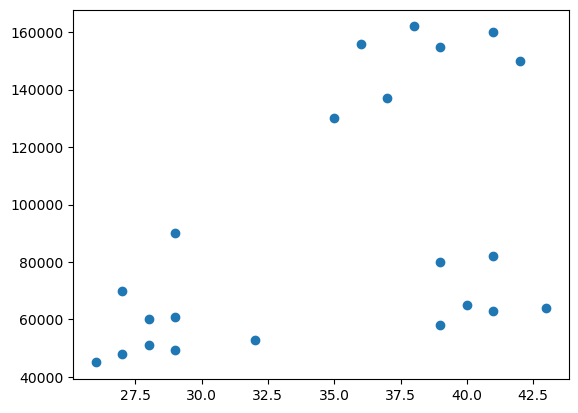

In [4]:
plt.scatter(df['Age'],df['Income($)'])

In [5]:
km = KMeans(n_clusters=3)

In [7]:
y_pred = km.fit_predict(df[['Age','Income($)']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [8]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [9]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

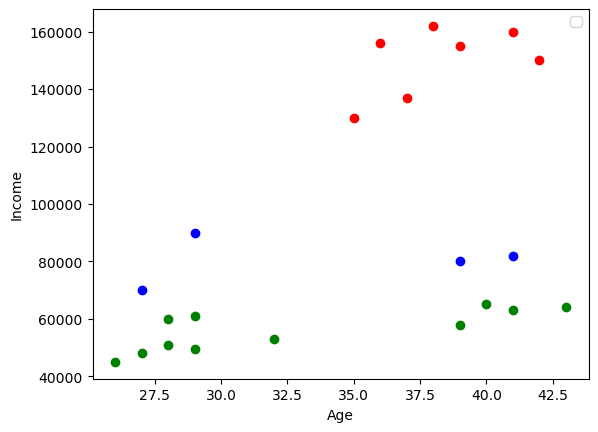

In [11]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [15]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [16]:
df

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [19]:
kmx = KMeans(n_clusters=3)
y_pred = kmx.fit_predict(df[['Age','Income($)']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [20]:
df['Cluster']=y_pred
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


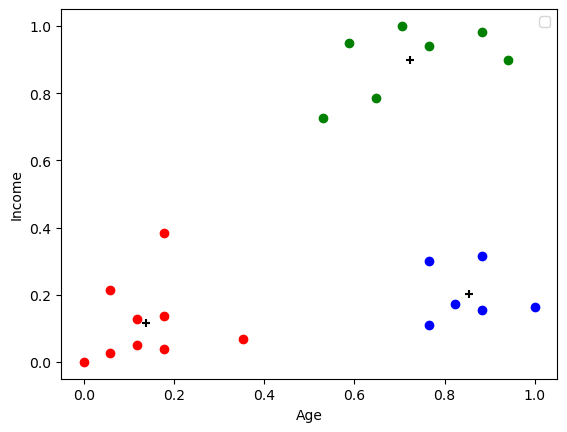

In [24]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(kmx.cluster_centers_[:,0],kmx.cluster_centers_[:,1],color = 'black', marker = '+')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [25]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [26]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.34910470944195643,
 0.2755825568722976,
 0.22020960864009395,
 0.16858512236029755,
 0.1326541982724516,
 0.10383752586603559]

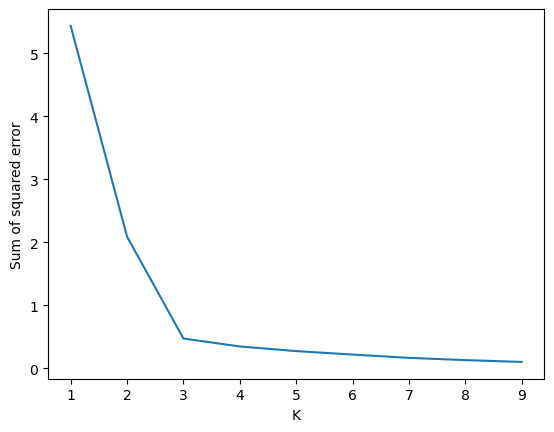

In [27]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

Here 3 is the elbow point, therefore k = 3

# Example

In [28]:
from sklearn.datasets import load_iris

In [29]:
iris = load_iris()

In [30]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [32]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [33]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let us consider only sepal length and width

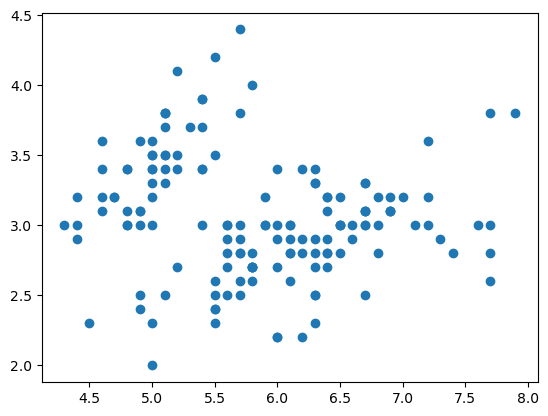

In [34]:
plt.scatter(data['sepal length (cm)'],data['sepal width (cm)'])

too complex to find the value of k

Lets use Elbow Method to find k

In [45]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    kmm = KMeans(n_clusters=k)
    kmm.fit(data[['sepal length (cm)','sepal width (cm)']])
    sse.append(kmm.inertia_)


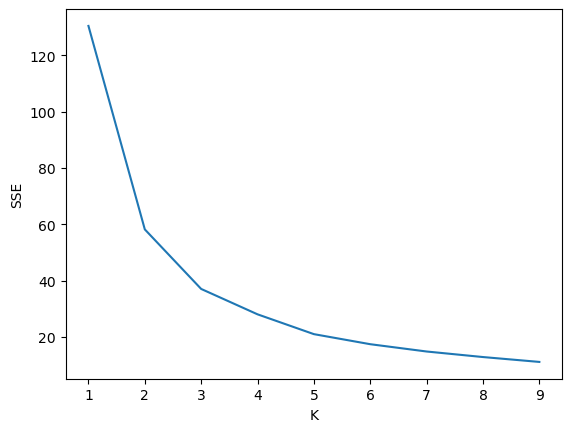

In [46]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

Seems like the elbow value is 3

Lets train the model by k =3

In [47]:
kme = KMeans(3)
y_pred = kme.fit_predict(data[['sepal length (cm)','sepal width (cm)']])

In [48]:
data['Cluster'] = y_pred
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


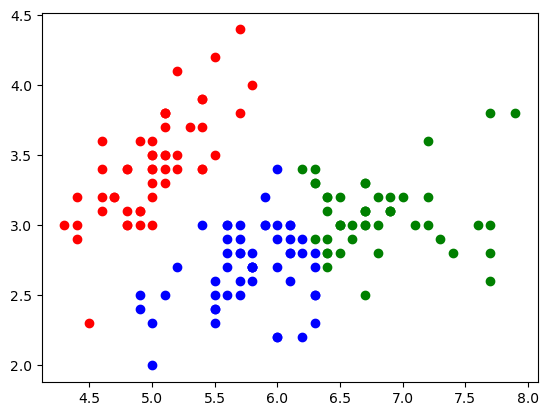

In [49]:
d1 = data[data.Cluster == 1]
d2 = data[data.Cluster == 0]
d3 = data[data.Cluster == 2]

plt.scatter(d1['sepal length (cm)'],d1['sepal width (cm)'],color='red')
plt.scatter(d2['sepal length (cm)'],d2['sepal width (cm)'],color='green')
plt.scatter(d3['sepal length (cm)'],d3['sepal width (cm)'],color='blue')

lets scale the values of sepal

In [50]:
scaler = MinMaxScaler()
scaler.fit(data[['sepal length (cm)']])
data['sepal length (cm)'] = scaler.transform(data[['sepal length (cm)']])

scaler.fit(data[['sepal width (cm)']])
data['sepal width (cm)'] = scaler.transform(data[['sepal width (cm)']])

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,0.222222,0.625000,1.4,0.2,1
1,0.166667,0.416667,1.4,0.2,1
2,0.111111,0.500000,1.3,0.2,1
3,0.083333,0.458333,1.5,0.2,1
4,0.194444,0.666667,1.4,0.2,1


In [51]:
kme = KMeans(3)
y_pred = kme.fit_predict(data[['sepal length (cm)','sepal width (cm)']])

In [52]:
data['Cluster'] = y_pred
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,0.222222,0.625000,1.4,0.2,1
1,0.166667,0.416667,1.4,0.2,1
2,0.111111,0.500000,1.3,0.2,1
3,0.083333,0.458333,1.5,0.2,1
4,0.194444,0.666667,1.4,0.2,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

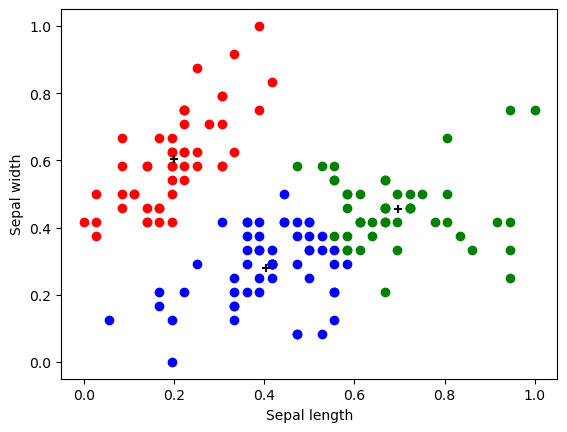

In [56]:
d1 = data[data.Cluster == 1]
d2 = data[data.Cluster == 0]
d3 = data[data.Cluster == 2]

plt.scatter(d1['sepal length (cm)'],d1['sepal width (cm)'],color='red')
plt.scatter(d2['sepal length (cm)'],d2['sepal width (cm)'],color='green')
plt.scatter(d3['sepal length (cm)'],d3['sepal width (cm)'],color='blue')
plt.scatter(kme.cluster_centers_[:,0],kme.cluster_centers_[:,1],color='black',marker='+')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend

Same steps for petal

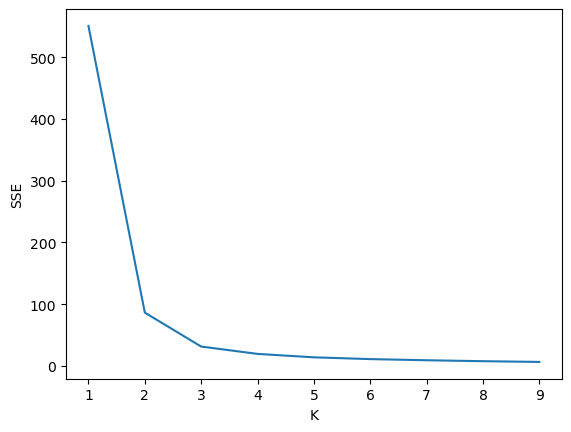

In [57]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    kmm = KMeans(n_clusters=k)
    kmm.fit(data[['petal length (cm)','petal width (cm)']])
    sse.append(kmm.inertia_)

plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [58]:
scaler = MinMaxScaler()
scaler.fit(data[['petal length (cm)']])
data['petal length (cm)'] = scaler.transform(data[['petal length (cm)']])

scaler.fit(data[['petal width (cm)']])
data['petal width (cm)'] = scaler.transform(data[['petal width (cm)']])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1


In [59]:
kme = KMeans(3)
y_pred = kme.fit_predict(data[['petal length (cm)','petal width (cm)']])

data['pCluster'] = y_pred


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,pCluster
0,0.222222,0.625000,0.067797,0.041667,1,0
1,0.166667,0.416667,0.067797,0.041667,1,0
2,0.111111,0.500000,0.050847,0.041667,1,0
3,0.083333,0.458333,0.084746,0.041667,1,0
4,0.194444,0.666667,0.067797,0.041667,1,0


<function matplotlib.pyplot.legend(*args, **kwargs)>

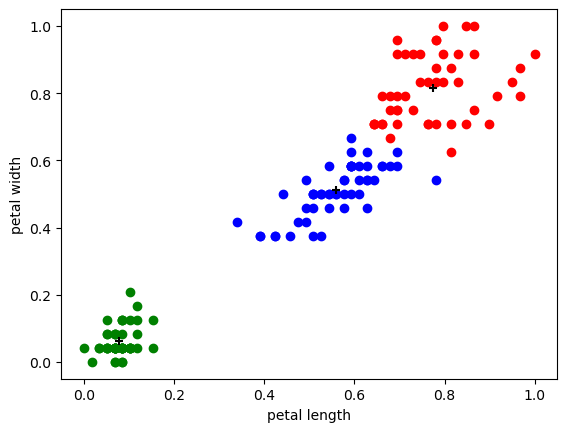

In [60]:
d1 = data[data.pCluster == 1]
d2 = data[data.pCluster == 0]
d3 = data[data.pCluster == 2]

plt.scatter(d1['petal length (cm)'],d1['petal width (cm)'],color='red')
plt.scatter(d2['petal length (cm)'],d2['petal width (cm)'],color='green')
plt.scatter(d3['petal length (cm)'],d3['petal width (cm)'],color='blue')
plt.scatter(kme.cluster_centers_[:,0],kme.cluster_centers_[:,1],color='black',marker='+')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend